In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptron import Perceptron

In [2]:
try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    df = pd.read_csv("/Users/vatsalsodha/ML_codes/machine-learning-book/ch02/iris.data", 
                     header=None,
                     encoding='utf-8')

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
print(df.describe())
print(df.shape)

                0           1           2           3
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
(150, 5)


In [5]:
df[4].unique()
# so we have 3 class

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
df = df.loc[df[4] != "Iris-virginica"]

(100,) (100, 2)


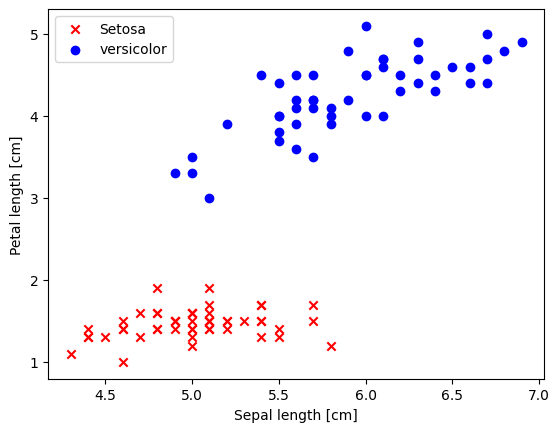

In [7]:
# Plotting the IRIS data
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
X = df.iloc[0:100, [0,2]].values
print(y.shape, X.shape)

plt.scatter(X[0:50, 0], X[0:50, 1], color='red', marker='x', label='Setosa')
plt.scatter(X[51:, 0], X[51:, 1], color='blue', marker='o', label='versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend()
plt.show()

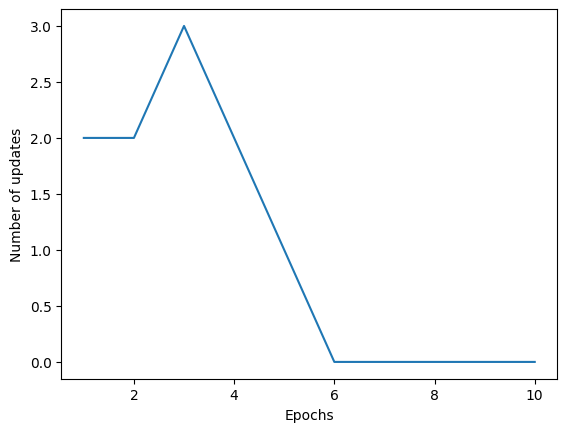

In [8]:
# Trainig perceptron model

perceptron = Perceptron(eta=0.1, n_iter=10)
perceptron.fit(X, y)
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

## Adaline algorithm

In [9]:
from adaline import Adaline

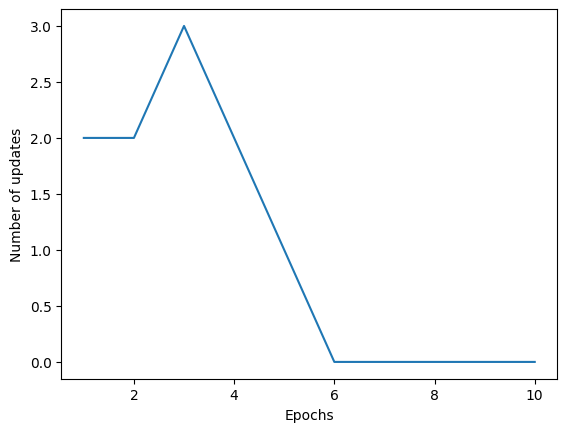

In [10]:
adaline = Adaline(eta=0.1, n_iter=10)
adaline.fit(X, y)
plt.plot(range(1, len(perceptron.errors_) + 1), perceptron.errors_)
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

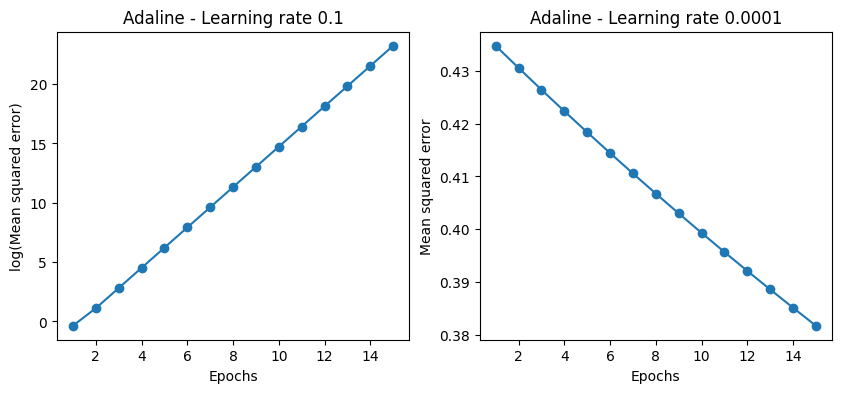

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = Adaline(n_iter=15, eta=0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses) + 1), np.log10(ada1.losses), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = Adaline(n_iter=15, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses) + 1), ada2.losses, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

In [12]:
z = adaline.predict(X)

In [13]:
np.dot(X.T, z).shape

(2,)

In [14]:
# standardize features
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [15]:
from adalineSGD import AdalineSGD

/Users/vatsalsodha/ML_codes/ML_book/ch02/adalineSGD.py:28: RuntimeWarning: overflow encountered in double_scalars
  loss = error**2


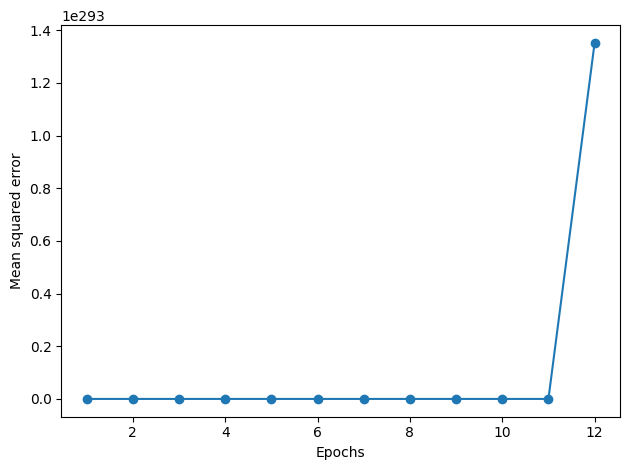

In [16]:
ada_gd = AdalineSGD(n_iter=20, eta=0.5)
ada_gd.fit(X_std, y)

plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')

plt.tight_layout()
#plt.savefig('images/02_14_2.png', dpi=300)
plt.show()